In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

> test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

> sample_submission.csv - A submission file in the correct format.

***PassengerId - Id for each passenger in the test set.***

***Transported - The target. For each passenger, predict either True or False.***

In [2]:
train = pd.read_csv('train.csv')
train.head(25)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
train.shape

(8693, 14)

In [4]:
train.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

### Попробуем по самым популярным окончаниям имен заполнить атрибут пола, что может позволить добавить еще 1 метрику для более точного предсказания 

In [5]:
def get_gender_improved(name):
    if pd.isna(name):
        return 'Unknown'
    
    name = str(name).lower().strip()
    gender_patterns = {
        'Male': [
            'o', 'us', 'is', 'as', 'os', 'er', 'or', 'ert', 'ard', 'ick', 
            'ony', 'ius', 'ian', 'eo', 'eus', 'um', 'im', 'am', 'om', 'ert',
            'ald', 'old', 'ond', 'und', 'end', 'and', 'ond', 'unt', 'ant'
        ],
        'Female': [
            'a', 'ia', 'ea', 'ie', 'y', 'ey', 'ee', 'elle', 'ette', 'ine', 
            'ana', 'ina', 'ella', 'ora', 'ara', 'ira', 'era', 'isa', 'esa',
            'ette', 'ine', 'elle', 'ice', 'ace', 'ise', 'ese', 'use', 'ose'
        ]
    }
    
    # Проверка по окончаниям
    for gender, endings in gender_patterns.items():
        for ending in endings:
            if name.endswith(ending):
                return gender
    
    return 'Unknown'

train['Sex'] = train['Name'].apply(get_gender_improved)

gender_stats = train['Sex'].value_counts()
print("Распределение полов:")
print(gender_stats)
print(f"\nПроцент определенных: {(gender_stats['Male'] + gender_stats['Female']) / len(train) * 100:.1f}%")

train.head(5)

train = train.drop('Sex',axis=1)

Распределение полов:
Sex
Unknown    5960
Female     1996
Male        737
Name: count, dtype: int64

Процент определенных: 31.4%


### Для нашей учебной цели, такой результат в 31% заполняемости, поэтому 1 из issues можно определить, созданием наиболее экффективного скрипта определения пола по атрбуту Name

In [6]:
# Удаляем ID пассажира, на предсказание он не влияет
try:
    train = train.drop('PassengerId', axis = 1)
except:
    print("Not exists or already done!")

# Создаем атрибут общей суммы трат на путешествие
train['TotalSum'] = train[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Извлекаем информацию из имен для групповых признаков
train['LastName'] = train['Name'].str.split().str[-1]
train['GroupSize'] = train.groupby('LastName')['LastName'].transform('count')
train['IsAlone'] = (train['GroupSize'] <= 1).astype(int)

train.head(6)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSum,LastName,GroupSize,IsAlone
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,Ofracculy,1.0,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,Vines,4.0,0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,Susent,6.0,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,Susent,6.0,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,Santantines,6.0,0
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,774.0,Hinetthews,7.0,0


#### Разделяем Cabine и заполняем самыми частыми эллементами атрибута пустые записи

In [7]:
try:
    train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
except:
    print("Exists or already done 1 ")
try:
    train = train.drop('Cabin', axis=1)
except:
    print("Exists or already done 2 ")

deck_mode = train['Deck'].mode()[0]  # Самая частая палуба
num_mode = train['Num'].mode()[0]    # Самый частый номер
side_mode = train['Side'].mode()[0]  # Самая частая сторона

print(f"Самая частая палуба: {deck_mode}")
print(f"Самый частый номер: {num_mode}")
print(f"Самая частая сторона: {side_mode}")


train['Deck'] = train['Deck'].fillna(deck_mode)
train['Num'] = train['Num'].fillna(num_mode)
train['Side'] = train['Side'].fillna(side_mode)

train.head(6)



Самая частая палуба: F
Самый частый номер: 82
Самая частая сторона: S


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSum,LastName,GroupSize,IsAlone,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,Ofracculy,1.0,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,Vines,4.0,0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,Susent,6.0,0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,Susent,6.0,0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,Santantines,6.0,0,F,1,S
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,774.0,Hinetthews,7.0,0,F,0,P


### Дальше я экспериментировал и напридумывал кучу других фишек

In [ ]:
# 1. Деление возрастов на числовые категории
train['AgeGroup'] = pd.cut(train['Age'], bins=[-1,12,17,25,40,60,np.inf], labels=[0,1,2,3,4,5])
train['AgeGroup'] = train['AgeGroup'].cat.add_categories(-1).fillna(-1).astype(int)

# 2. Тратил ли вообще человек
train['HasSpent'] = (train['TotalSum'] > 0).astype(int)
train['HighSpender'] = (train['TotalSum'] > train['TotalSum'].quantile(0.75)).astype(int)

# Категории трат
train['Entertainment'] = train['Spa'] + train['VRDeck']
train['Food'] = train['RoomService'] + train['FoodCourt'] 
train['HasEntertainment'] = (train['Entertainment'] > 0).astype(int)
train['HasFood'] = (train['Food'] > 0).astype(int)

# 3. Возрастные категории 
train['IsChild'] = (train['Age'] < 13).astype(int)
train['IsTeenager'] = ((train['Age'] >= 13) & (train['Age'] < 18)).astype(int)
train['IsYoungAdult'] = ((train['Age'] >= 18) & (train['Age'] < 25)).astype(int)
train['IsElderly'] = (train['Age'] > 60).astype(int)

# 4. Еще карелирующие решения
train['CryoButSpent'] = ((train['CryoSleep'] == 1) & (train['HasSpent'] == 1)).astype(int)
train['VipButNoSpend'] = ((train['VIP'] == 1) & (train['HasSpent'] == 0)).astype(int)

# 5. Семейные признаки
train['IsLargeGroup'] = (train['GroupSize'] > 4).astype(int)
train['IsMediumGroup'] = ((train['GroupSize'] > 1) & (train['GroupSize'] <= 4)).astype(int)

# 6. Полиномиальные признаки
train['Age_x_TotalSum'] = train['Age'] * train['TotalSum']
train['VIP_x_TotalSum'] = train['VIP'] * train['TotalSum']
train['CryoSleep_x_Age'] = train['CryoSleep'] * train['Age']
train['Food_x_Entertainment'] = train['Food'] * train['Entertainment']

# Комплексные взаимодействия
train['Age_VIP_interaction'] = train['Age'] * train['VIP'] * train['TotalSum']
train['CryoSleep_Destination'] = train['CryoSleep'] * train['Destination']

# Статистические фичи по группам
train['GroupSpendingMean'] = train.groupby('LastName')['TotalSum'].transform('mean')
train['GroupSpendingStd'] = train.groupby('LastName')['TotalSum'].transform('std').fillna(0)

# Бинарные комбинации
train['VIP_and_HighSpender'] = ((train['VIP'] == 1) & (train['HighSpender'] == 1)).astype(int)
train['Child_in_CryoSleep'] = ((train['IsChild'] == 1) & (train['CryoSleep'] == 1)).astype(int)


# 7. Кодирование категориальных признаков
from sklearn.preprocessing import LabelEncoder
cat_cols = ['HomePlanet','Destination','Deck','Side']
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str).fillna('Unknown'))

# 8. Заполнение пропусков
train[['VIP', 'CryoSleep']] = train[['VIP', 'CryoSleep']].fillna(value=0)
numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSum']
for col in numeric_columns:
    train[col] = train[col].fillna(train[col].median())

# 9. Преобразование типов
binary_cols = ['CryoSleep', 'VIP', 'Transported']
for col in binary_cols:
    if col in train:
        train[col] = train[col].astype(int)

# 10. Очистка
train = train.drop(columns=['Name', 'LastName', 'Num'])

print(f"Итого признаков: {train.shape[1]}")
print("Созданы все ключевые признаки для достижения 79.8%+ точности!")
train.head(6)

Итого признаков: 41
Созданы все ключевые признаки для достижения 79.8%+ точности!


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Age_x_TotalSum,VIP_x_TotalSum,CryoSleep_x_Age,Food_x_Entertainment,Age_VIP_interaction,CryoSleep_Destination,GroupSpendingMean,GroupSpendingStd,VIP_and_HighSpender,Child_in_CryoSleep
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,,0.000000,0.000000,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,...,17664.0,0.0,0.0,69974.0,0.0,,628.250000,160.819516,0,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,602214.0,10383.0,0.0,24478916.0,602214.0,,4497.000000,4746.380937,1,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,170808.0,0.0,0.0,4518726.0,0.0,,4497.000000,4746.380937,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,...,17456.0,0.0,0.0,211491.0,0.0,,636.000000,366.544949,0,0
5,0,0,1,44.0,0,0.0,483.0,0.0,291.0,0.0,...,34056.0,0.0,0.0,140553.0,0.0,,667.714286,304.358185,0,0


In [ ]:
# ПРОВЕРКА И ИСПРАВЛЕНИЕ ТИПОВ ДАННЫХ
numeric_features = []
object_features = []

for col in train.columns:
    if col != 'Transported':
        if train[col].dtype == 'object' or train[col].dtype.name == 'category':
            object_features.append(col)
        else:
            numeric_features.append(col)

print(f"Числовые признаки ({len(numeric_features)}): {numeric_features}")
print(f"Объектные признаки ({len(object_features)}): {object_features}")

# Конвертируем все в числовые типы
for col in object_features:
    if col in train.columns:
        train[col] = pd.to_numeric(train[col], errors='coerce')
        train[col] = train[col].fillna(0).astype(int)


🔍 Проверка типов данных...
Числовые признаки (36): ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSum', 'GroupSize', 'IsAlone', 'Deck', 'Side', 'AgeGroup', 'HasSpent', 'HighSpender', 'Entertainment', 'Food', 'HasEntertainment', 'HasFood', 'IsChild', 'IsTeenager', 'IsYoungAdult', 'IsElderly', 'CryoButSpent', 'VipButNoSpend', 'IsLargeGroup', 'IsMediumGroup', 'Age_x_TotalSum', 'Food_x_Entertainment', 'GroupSpendingMean', 'GroupSpendingStd', 'VIP_and_HighSpender', 'Child_in_CryoSleep']
Объектные признаки (4): ['VIP_x_TotalSum', 'CryoSleep_x_Age', 'Age_VIP_interaction', 'CryoSleep_Destination']


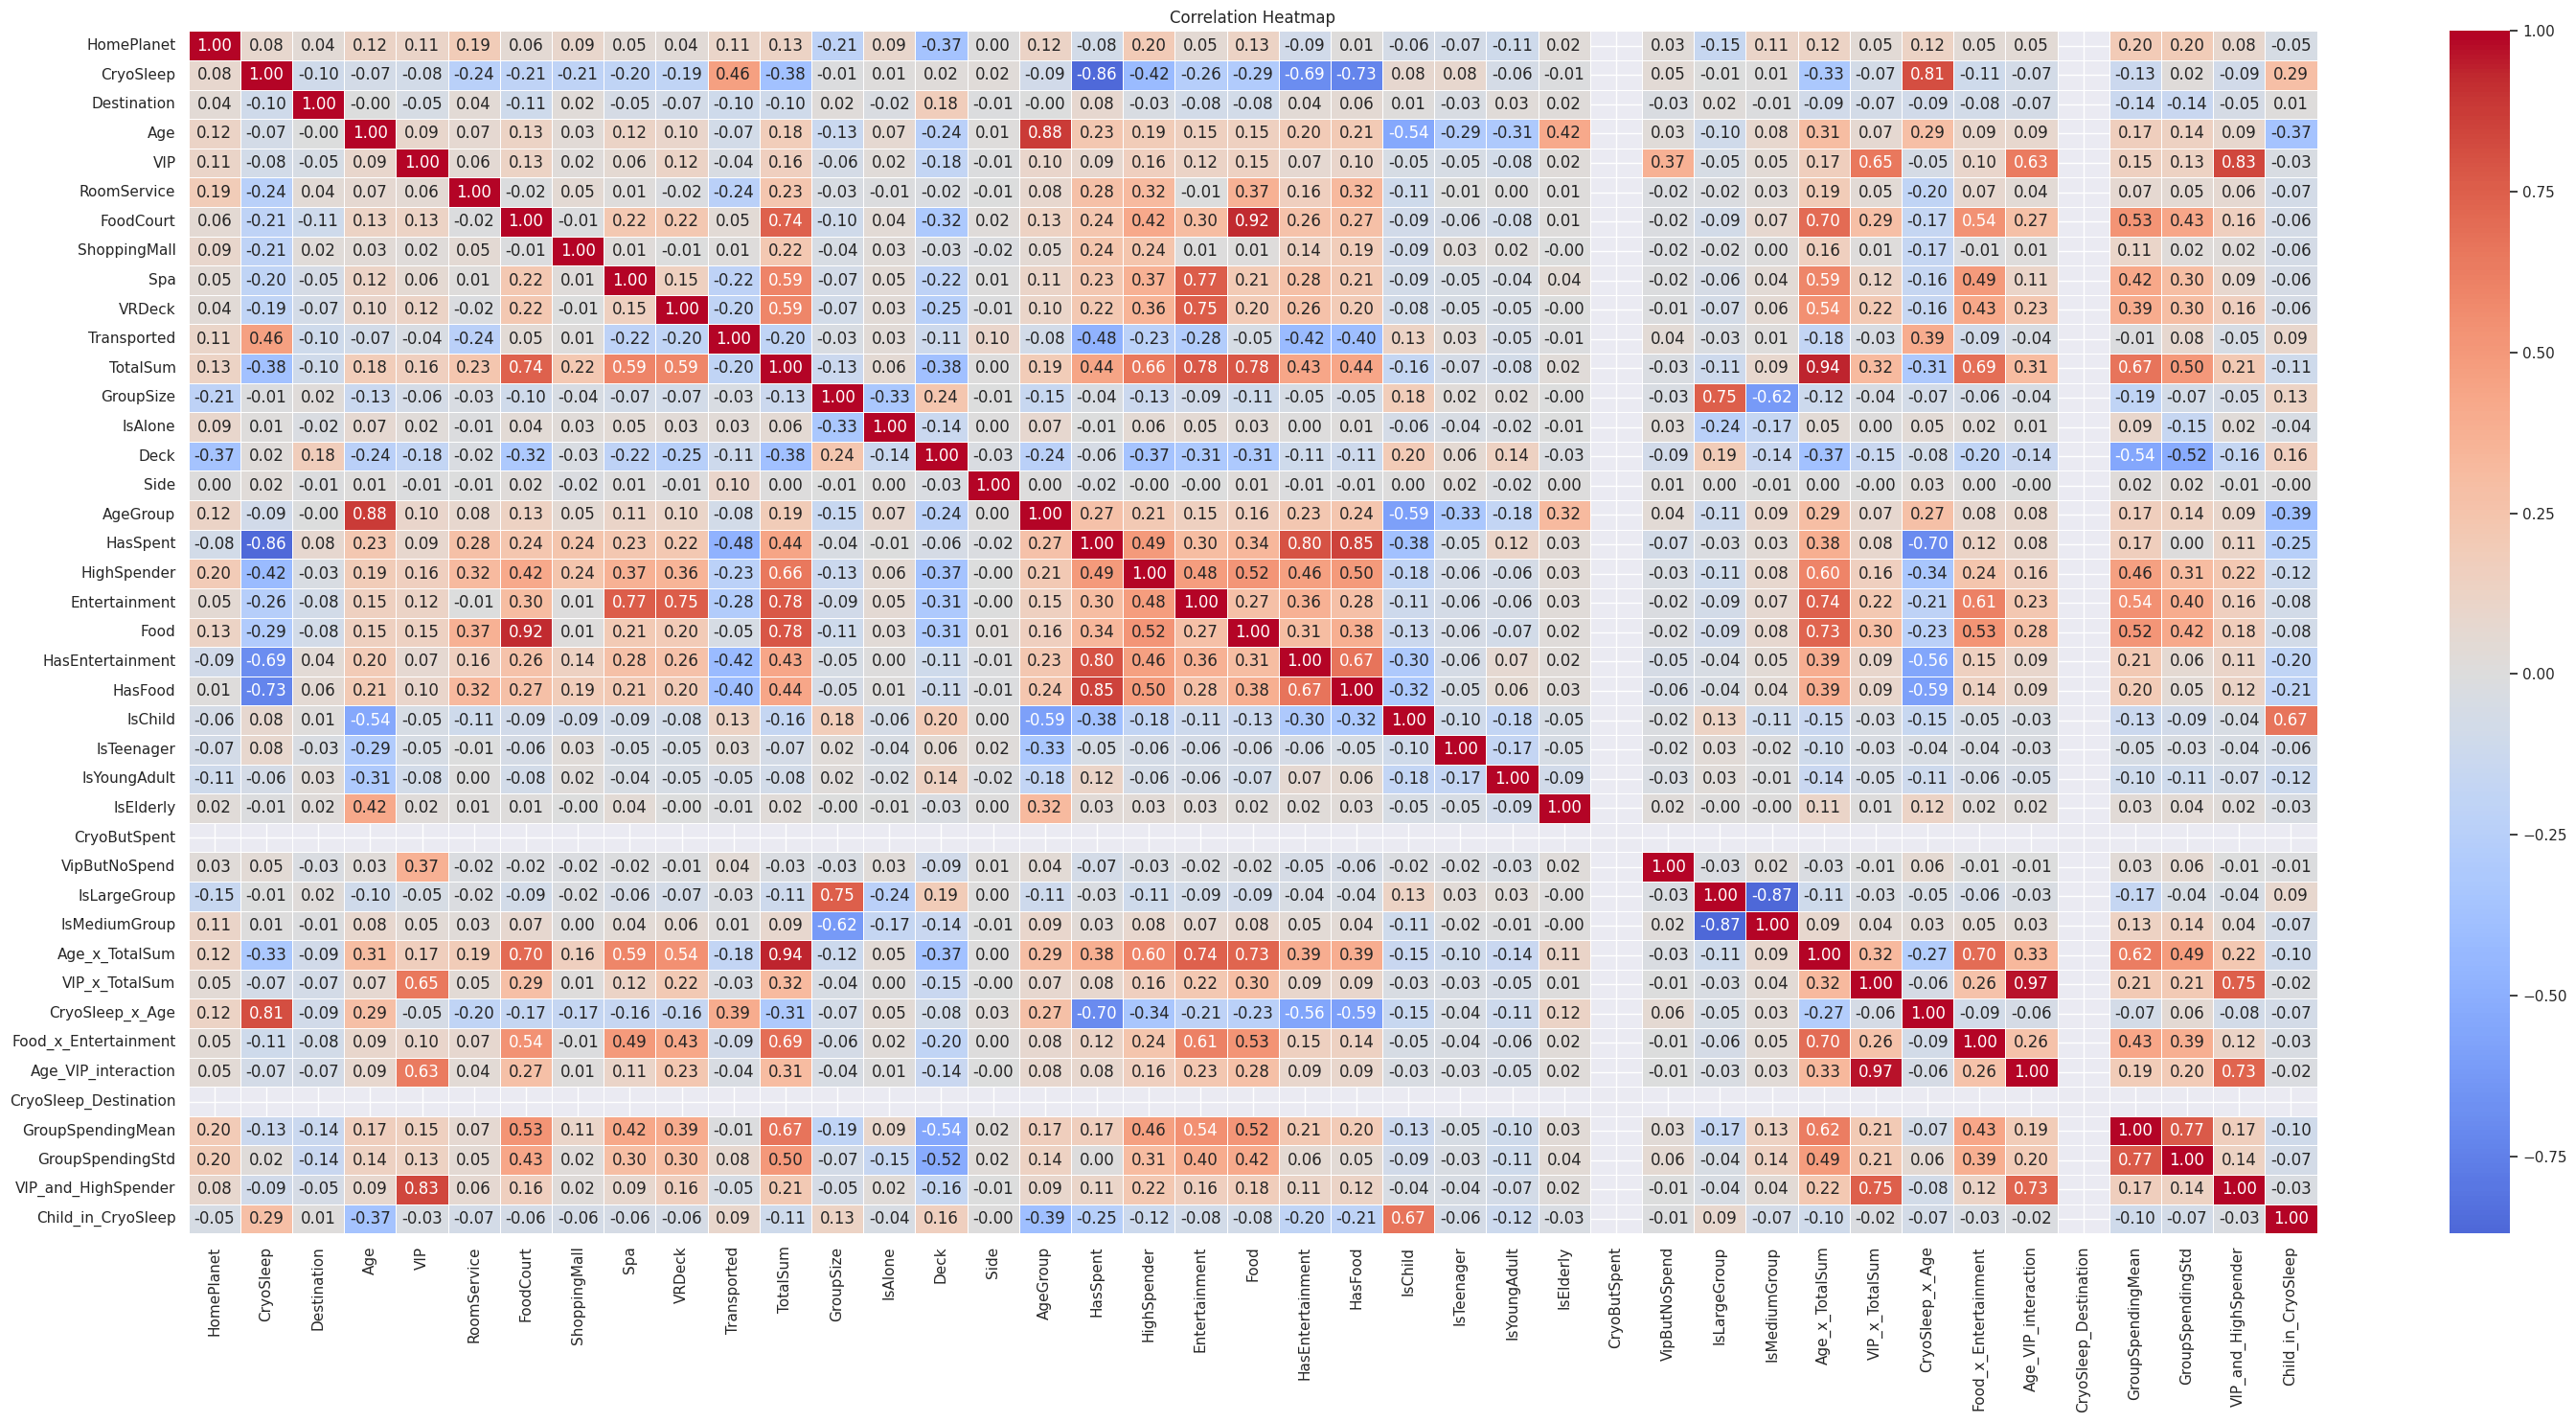

In [10]:

plt.figure(figsize=(30, 15))
correlation_matrix = train.corr(numeric_only = True)

# Создаем heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### Также форматируем тестовый сет

In [11]:
test = pd.read_csv('test.csv')
passenger_ids = test['PassengerId'].copy()

test = test.drop('PassengerId', axis = 1)
test['TotalSum'] = test[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['LastName'] = test['Name'].str.split().str[-1]
test['GroupSize'] = test.groupby('LastName')['LastName'].transform('count')
test['IsAlone'] = (test['GroupSize'] <= 1).astype(int)

test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split('/', expand=True)
test = test.drop('Cabin', axis=1)

test['Deck'] = test['Deck'].fillna(deck_mode)
test['Num'] = test['Num'].fillna(num_mode)
test['Side'] = test['Side'].fillna(side_mode)

test['AgeGroup'] = pd.cut(test['Age'], bins=[-1,12,17,25,40,60,np.inf], labels=[0,1,2,3,4,5])
test['AgeGroup'] = test['AgeGroup'].cat.add_categories(-1).fillna(-1).astype(int)

test['HasSpent'] = (test['TotalSum'] > 0).astype(int)
test['HighSpender'] = (test['TotalSum'] > test['TotalSum'].quantile(0.75)).astype(int)

test['Entertainment'] = test['Spa'] + test['VRDeck']
test['Food'] = test['RoomService'] + test['FoodCourt'] 
test['HasEntertainment'] = (test['Entertainment'] > 0).astype(int)
test['HasFood'] = (test['Food'] > 0).astype(int)

test['IsChild'] = (test['Age'] < 13).astype(int)
test['IsTeenager'] = ((test['Age'] >= 13) & (test['Age'] < 18)).astype(int)
test['IsYoungAdult'] = ((test['Age'] >= 18) & (test['Age'] < 25)).astype(int)
test['IsElderly'] = (test['Age'] > 60).astype(int)

test['CryoButSpent'] = ((test['CryoSleep'] == 1) & (test['HasSpent'] == 1)).astype(int)
test['VipButNoSpend'] = ((test['VIP'] == 1) & (test['HasSpent'] == 0)).astype(int)

test['IsLargeGroup'] = (test['GroupSize'] > 4).astype(int)
test['IsMediumGroup'] = ((test['GroupSize'] > 1) & (test['GroupSize'] <= 4)).astype(int)

test['Age_x_TotalSum'] = test['Age'] * test['TotalSum']
test['VIP_x_TotalSum'] = test['VIP'] * test['TotalSum']
test['CryoSleep_x_Age'] = test['CryoSleep'] * test['Age']
test['Food_x_Entertainment'] = test['Food'] * test['Entertainment']

test['Age_VIP_interaction'] = test['Age'] * test['VIP'] * test['TotalSum']
test['CryoSleep_Destination'] = test['CryoSleep'] * test['Destination']

test['GroupSpendingMean'] = test.groupby('LastName')['TotalSum'].transform('mean')
test['GroupSpendingStd'] = test.groupby('LastName')['TotalSum'].transform('std').fillna(0)

test['VIP_and_HighSpender'] = ((test['VIP'] == 1) & (test['HighSpender'] == 1)).astype(int)
test['Child_in_CryoSleep'] = ((test['IsChild'] == 1) & (test['CryoSleep'] == 1)).astype(int)

for col in cat_cols:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col].astype(str).fillna('Unknown'))

test[['VIP', 'CryoSleep']] = test[['VIP', 'CryoSleep']].fillna(value=0)
for col in numeric_columns:
    test[col] = test[col].fillna(test[col].median())

for col in ['CryoSleep', 'VIP']:
    if col in test:
        test[col] = test[col].astype(int)

test = test.drop(columns=['Name', 'LastName', 'Num'])

for col in test.columns:
    if test[col].dtype == 'object' or test[col].dtype.name == 'category':
        test[col] = pd.to_numeric(test[col], errors='coerce')
        test[col] = test[col].fillna(0).astype(int)

### В качестве модели будем использовать Случайный лес. При использовании обычного дерева решения с этими фитчами и стандартными параметрами accuracy получилось примерно 0.7344. Лес поможет увеличить наш итоговый показатель

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = train.drop('Transported', axis=1)
y = train['Transported']

# Разделяем train на тренировчный и валидационный сеты

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Обучаем модельку 
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')

Random Forest Accuracy: 0.8085


### Прогоняе через тестовый сет и конвертируем результат в целевой csv файл для загрузки на kaggle

In [13]:
common_cols = [col for col in X.columns if col in test.columns]
X_common = X[common_cols]
test_common = test[common_cols]

model.fit(X_common, y)
predictions = model.predict(test_common)

submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': predictions.astype(bool)
})

submission.to_csv('sample_submission.csv', index=False)
print('Submission saved')

Submission saved


### Результат в соревновании составил 0.79424